In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


P15 DDA算法实现

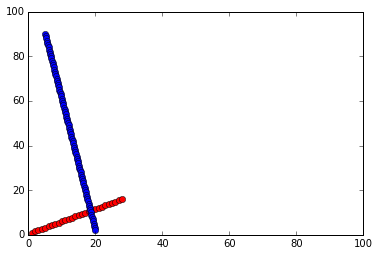

In [6]:
def line(l,r):
    px = []
    py = []
    x0,y0 = l
    x1,y1 = r
    dx = x1-x0
    dy = y1-y0
    steps = max(abs(dx), abs(dy))
    xi = dx/steps
    yi = dy/steps
    x = x0
    y = y0
    px.append(x)
    py.append(y)
    for i in xrange(steps):
        x += xi
        y += yi
        px.append(x)
        py.append(y)
    return px,py



px,py = line((1,1),(28,16))
plt.plot(px,py,'or')
px,py = line((5,90),(20,2))
plt.plot(array(px),array(py),'ob')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

CYTHON优化版本

In [7]:
%%cython
from __future__ import division
import numpy as np
cimport numpy as np
DTYPE = np.int
ctypedef np.int_t DTYPE_t
cimport cython
def line3(l,r):
    cdef int x0,y0,x1,y1,dx,dy,steps,k
    cdef float xi,yi,x,y
    x0,y0 = l
    x1,y1 = r
    x = x0
    y = y0
    dx = x1-x0
    dy = y1-y0
    steps = max(abs(dx), abs(dy))
    cdef np.ndarray px = np.zeros(steps+1, dtype=DTYPE)
    cdef np.ndarray py = np.zeros(steps+1, dtype=DTYPE)
    xi = <float>dx/steps
    yi = <float>dy/steps
    px[0] = <int>x
    py[0] = <int>y
    cdef unsigned int i
    for i in range(steps):
        x += xi
        y += yi
        px[i+1] = <int>x
        py[i+1] = <int>y
    return px,py